In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"/Users/mehmetkorkmaz/Applications/venv/auto-mpg.csv")

In [2]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
#data["los"]=np.where(data["location"].str.contains("Los Angeles"), 1, 0)

In [4]:
#data["tex"]=np.where(data["location"].str.contains("Texas"), 1, 0)

In [5]:
#data["fe"]=np.where(data["location"].str.contains("Santa Fe"), 1, 0)

In [6]:
#dummies = pd.get_dummies(data[['origin']])
#automatic dummy creation

In [7]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
data=data.drop('car name',axis=1)
data=data.replace('?',np.nan)
data=data.apply(lambda x: x.fillna(x.median()),axis=0)

In [9]:
data=pd.get_dummies(data, columns=['origin'], drop_first=True).astype(int)

In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
0,18,8,307,130,3504,12,70,0,0
1,15,8,350,165,3693,11,70,0,0
2,18,8,318,150,3436,11,70,0,0
3,16,8,304,150,3433,12,70,0,0
4,17,8,302,140,3449,10,70,0,0


In [11]:
import statsmodels.api as sm
X = data.loc[:,['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year','origin_2','origin_3']]
y = data["mpg"]

In [12]:
X = sm.add_constant(X)
np.asarray(data)

array([[ 18,   8, 307, ...,  70,   0,   0],
       [ 15,   8, 350, ...,  70,   0,   0],
       [ 18,   8, 318, ...,  70,   0,   0],
       ...,
       [ 32,   4, 135, ...,  82,   0,   0],
       [ 28,   4, 120, ...,  82,   0,   0],
       [ 31,   4, 119, ...,  82,   0,   0]])

In [13]:
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     223.5
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          2.37e-140
Time:                        17:10:16   Log-Likelihood:                -1036.6
No. Observations:                 398   AIC:                             2091.
Df Residuals:                     389   BIC:                             2127.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.1644      4.652     -3.474      0.001     -25.311      -7.017
cylinders       -0.4614      0.320     -1.444      0.150      -1.090       0.167
displacement     0.0243      0.008      3.192      0.002       0.009       0.039
horsepower      -0.0151      0.013     -1.131      0.259      -0.041       0.011
weight          -0.0069      0.001    -10.857      0.000      -0.008      -0.006
acceleration     0.0953      0.094      1.012      0.312      -0.090       0.280
model year       0.7492      0.051     14.626      0.000       0.648       0.850
origin_2         2.8051      0.558      5.031      0.000       1.709       3.901
origin_3         2.8531      0.547      5.212      0.000       1.777       3.929
==============================================================================
Omnibus:                       19.624   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.767
Skew:                           0.405   Prob(JB):                     1.54e-06
Kurtosis:                       3.979   Cond. No.                     8.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model.fittedvalues

0      14.989225
1      14.103396
2      15.329797
3      15.105202
4      14.906357
         ...    
393    27.653082
394    35.350467
395    30.605590
396    28.699889
397    28.068160
Length: 398, dtype: float64

In [15]:
model.resid

0      3.010775
1      0.896604
2      2.670203
3      0.894798
4      2.093643
         ...   
393   -0.653082
394    8.649533
395    1.394410
396   -0.699889
397    2.931840
Length: 398, dtype: float64

In [16]:
from sklearn import metrics
metrics.mean_squared_error(y,model.fittedvalues)
print('MAE:', metrics.mean_absolute_error(y, model.fittedvalues))
print('MSE:', metrics.mean_squared_error(y, model.fittedvalues))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, model.fittedvalues)))

MAE: 2.5293880244790694
MSE: 10.711816133793537
RMSE: 3.2728910971484426


# stepwise reg

In [17]:
X = data.loc[:,['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year','origin_2','origin_3']]
X = sm.add_constant(X)
y = data["mpg"]
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     223.5
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          2.37e-140
Time:                        17:10:22   Log-Likelihood:                -1036.6
No. Observations:                 398   AIC:                             2091.
Df Residuals:                     389   BIC:                             2127.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.1644      4.652     -3.474      0.001     -25.311      -7.017
cylinders       -0.4614      0.320     -1.444      0.150      -1.090       0.167
displacement     0.0243      0.008      3.192      0.002       0.009       0.039
horsepower      -0.0151      0.013     -1.131      0.259      -0.041       0.011
weight          -0.0069      0.001    -10.857      0.000      -0.008      -0.006
acceleration     0.0953      0.094      1.012      0.312      -0.090       0.280
model year       0.7492      0.051     14.626      0.000       0.648       0.850
origin_2         2.8051      0.558      5.031      0.000       1.709       3.901
origin_3         2.8531      0.547      5.212      0.000       1.777       3.929
==============================================================================
Omnibus:                       19.624   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.767
Skew:                           0.405   Prob(JB):                     1.54e-06
Kurtosis:                       3.979   Cond. No.                     8.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns                                                         
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

        feature         VIF
0         const  786.015060
1     cylinders   10.703517
2  displacement   22.890779
3    horsepower    9.451868
4        weight   10.551877
5  acceleration    2.418356
6    model year    1.299447
7      origin_2    1.636549
8      origin_3    1.731440


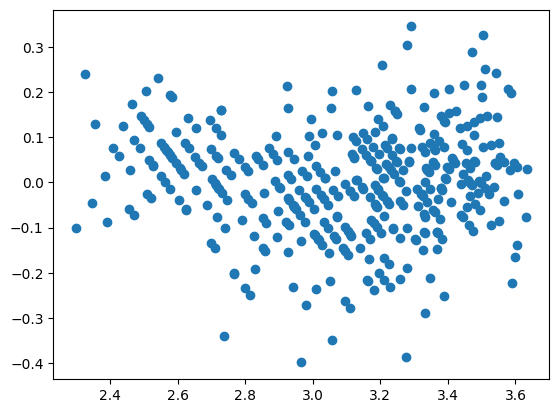

In [62]:
import matplotlib.pyplot as plt
x=model.fittedvalues
y=model.resid
plt.scatter(x, y)

In [63]:
metrics.mean_squared_error(y,model.fittedvalues)
print('MAE:', metrics.mean_absolute_error(y, model.fittedvalues))
print('MSE:', metrics.mean_squared_error(y, model.fittedvalues))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, model.fittedvalues)))

MAE: 3.094585884757854
MSE: 9.69083050127015
RMSE: 3.113009878119591


In [20]:
from statsmodels.stats.diagnostic import het_white

In [21]:
white_test = het_white(model.resid,  model.model.exog)

In [22]:
labels=("LM Statistic","LM-Test p-value", "F-Statistic", "F-Test p-value")
print(labels, white_test)

('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value') (123.02162461376216, 3.9715967253001863e-10, 3.884624612530419, 1.630432691365773e-12)


In [23]:
X = data.loc[:,['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year','origin_2','origin_3']]
y = np.log(data["mpg"])
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     355.0
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          1.45e-173
Time:                        17:10:29   Log-Likelihood:                 287.92
No. Observations:                 398   AIC:                            -557.8
Df Residuals:                     389   BIC:                            -522.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.8111      0.167     10.855      0.000       1.483       2.139
cylinders       -0.0279      0.011     -2.431      0.016      -0.050      -0.005
displacement     0.0008      0.000      2.983      0.003       0.000       0.001
horsepower      -0.0014      0.000     -2.977      0.003      -0.002      -0.000
weight          -0.0003   2.29e-05    -11.913      0.000      -0.000      -0.000
acceleration    -0.0007      0.003     -0.218      0.827      -0.007       0.006
model year       0.0291      0.002     15.859      0.000       0.026       0.033
origin_2         0.0897      0.020      4.486      0.000       0.050       0.129
origin_3         0.0821      0.020      4.182      0.000       0.044       0.121
==============================================================================
Omnibus:                        7.532   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                8.279
Skew:                          -0.237   Prob(JB):                       0.0159
Kurtosis:                       3.524   Cond. No.                     8.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

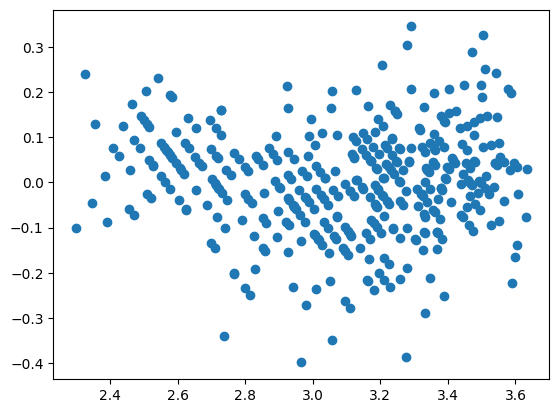

In [24]:
x=model.fittedvalues
y=model.resid
plt.scatter(x, y)

In [25]:
white_test = het_white(model.resid,  model.model.exog)

In [26]:
labels=("LM Statistic","LM-Test p-value", "F-Statistic", "F-Test p-value")
print(labels, white_test)

('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value') (110.50907147932182, 2.6883866509045193e-08, 3.3376433356098554, 5.837634944641026e-10)


# #Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_train

,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
64,1.0,8,318,150,4135,13,72,0,0
55,1.0,4,97,60,1834,19,71,1,0
317,1.0,4,97,78,2188,15,80,1,0
102,1.0,4,97,46,1950,21,73,1,0
358,1.0,4,120,74,2635,18,81,0,1
...,...,...,...,...,...,...,...,...,...
323,1.0,4,156,105,2800,14,80,0,0
192,1.0,6,250,105,3353,14,76,0,0
117,1.0,4,68,49,1867,19,73,1,0
47,1.0,6,250,100,3282,15,71,0,0


In [30]:
y_train

64     0.112339
55    -0.042143
317    0.045302
102   -0.125065
358    0.030849
         ...   
323    0.060789
192    0.102149
117   -0.012008
47     0.075483
172   -0.110527
Length: 318, dtype: float64

In [31]:
lmtrain = sm.OLS(y_train, X_train)
modeltrain = lmtrain.fit()
modeltrain.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2879
Date:                Sun, 11 Jun 2023   Prob (F-statistic):              0.970
Time:                        17:10:39   Log-Likelihood:                 228.55
No. Observations:                 318   AIC:                            -439.1
Df Residuals:                     309   BIC:                            -405.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0763      0.189     -0.404      0.686      -0.448       0.295
cylinders        0.0050      0.013      0.388      0.698      -0.020       0.030
displacement -3.797e-05      0.000     -0.121      0.904      -0.001       0.001
horsepower   -5.835e-05      0.001     -0.106      0.916      -0.001       0.001
weight        4.524e-06   2.58e-05      0.175      0.861   -4.63e-05    5.54e-05
acceleration     0.0038      0.004      0.971      0.332      -0.004       0.011
model year      -0.0002      0.002     -0.073      0.942      -0.004       0.004
origin_2        -0.0057      0.022     -0.257      0.797      -0.049       0.038
origin_3         0.0031      0.022      0.138      0.891      -0.041       0.047
==============================================================================
Omnibus:                        4.992   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                5.522
Skew:                          -0.171   Prob(JB):                       0.0632
Kurtosis:                       3.548   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
xtrain=modeltrain.fittedvalues
ytrain=modeltrain.resid

In [33]:
from sklearn import metrics
metrics.mean_squared_error(y_train,modeltrain.fittedvalues)
print('MAE:', metrics.mean_absolute_error(y_train, modeltrain.fittedvalues))
print('MSE:', metrics.mean_squared_error(y_train, modeltrain.fittedvalues))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, modeltrain.fittedvalues)))

MAE: 0.0910259258107899
MSE: 0.013907651500488028
RMSE: 0.11793070635117907


In [34]:
predictions = modeltrain.predict(X_test)

In [35]:
predictions

65    -0.001921
132   -0.001702
74     0.012765
78     0.002469
37    -0.000392
         ...   
269   -0.013715
235    0.005045
145    0.009439
196    0.017621
124   -0.013262
Length: 80, dtype: float64

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.09419015937756788
MSE: 0.013867792931029554
RMSE: 0.11776159361621069


## LASSO Regression

In [37]:
from sklearn.linear_model import Lasso
X = data.loc[:,['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year','origin_2','origin_3']]
y = np.log(data["mpg"])
X= sm.add_constant(X)                                    # y: logsal
lasso_model = Lasso(alpha = 0.2).fit(X, y)               #model for alpha=0,2

In [38]:
lasso_model
lasso_model.coef_                      #coefficients for alpha 0,2

array([ 0.        , -0.        , -0.00024459, -0.00104021, -0.0002676 ,
        0.        ,  0.01119849,  0.        ,  0.        ])

In [39]:
from sklearn.linear_model import LassoCV     
lasso_cv_model = LassoCV(alphas = None, cv = 10, max_iter = 10000).fit(X,y)
lasso_cv_model.alpha_                                         # finding optimum alpha 

0.25141408579911073

In [40]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X, y)
y_pred = lasso_tuned.predict(X)

In [41]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

0.14174383365818785

In [42]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 7.65e-05).fit(X, y)

In [43]:
lasso_model
lasso_model.coef_

array([ 0.        , -0.02748797,  0.00080335, -0.00141563, -0.00027241,
       -0.00071049,  0.02911643,  0.0883844 ,  0.08081042])

# Y is mpg, again LASSO

In [44]:
X = data.loc[:,['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year','origin_2','origin_3']]
y = data["mpg"]
X= sm.add_constant(X)
lasso_model = Lasso(alpha = 0.3).fit(X, y)

In [45]:
from sklearn.linear_model import LassoCV     
lasso_cv_model = LassoCV(alphas = None, cv = 10, 
                         max_iter = 10000)
lasso_cv_model.fit(X,y)
lasso_cv_model.alpha_

5.466321664856948

In [46]:
lasso_model
lasso_model.coef_ 

array([ 0.        , -0.        ,  0.00128349, -0.00486068, -0.00667228,
        0.        ,  0.69257312,  0.        ,  0.        ])

In [47]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X, y)
y_pred = lasso_tuned.predict(X)

In [48]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

3.7718778222481424

In [49]:
lasso_model = Lasso(alpha = lasso_cv_model.alpha_).fit(X, y)

In [50]:
lasso_model
lasso_model.coef_ 

array([ 0.        , -0.        , -0.00334543, -0.0119874 , -0.00644736,
        0.        ,  0.25074566,  0.        ,  0.        ])

## RIDGE Regression

In [51]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.4).fit(X, y)         # alfa 0.4 
ridge_model.coef_

array([ 0.        , -0.45701888,  0.02402798, -0.0148408 , -0.00691986,
        0.09520855,  0.74866168,  2.75825226,  2.80713871])

In [52]:
from sklearn.linear_model import RidgeCV         # MSE min yapan alfa bulunuyor sonra o alfa değeri ile katsayılar
lambdalar = 10**np.linspace(10,-2,100)*0.5         # tekrar hesaplanır.

In [53]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [54]:
ridge_model = Ridge()
katsayilar = []

In [55]:
for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X, y) 
    katsayilar.append(ridge_model.coef_) 

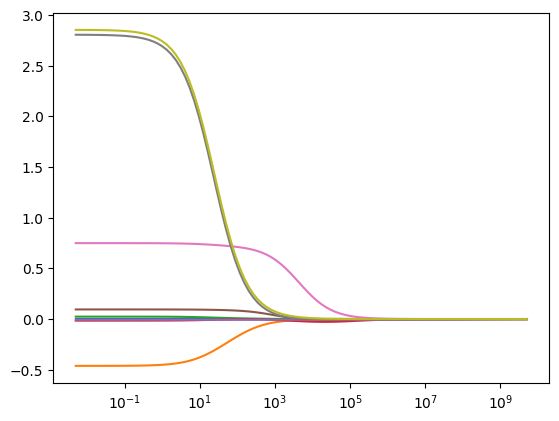

In [56]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

In [57]:
from sklearn.linear_model import RidgeCV                           # optimum alpha minimizes error
ridge_cv=RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error") 

In [58]:
ridge_cv.fit(X,y)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [59]:
ridge_cv.alpha_      

1.328043891473342

In [60]:
ridge_model = Ridge(alpha = ridge_cv.alpha_).fit(X, y)           # coefficients with optimum alfa 
ridge_model.coef_

array([ 0.        , -0.44719824,  0.02335549, -0.01423678, -0.00692049,
        0.09497946,  0.74752216,  2.6553486 ,  2.70604498])

In [61]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X, y)
y_pred = lasso_tuned.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

3.7718778222481424